# Homework 2 - balancing, transformations, and dimensionality reduction (deadline 22. 12. 2024, 23:59)

In short, the main task is to play with balancing, binning, transformations, and dimensionality reduction to obtain the best results for the binary classification task.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels!
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0). Split the dataset into a train, validation, and test set and **use these parts correctly (!)** in the following steps.
  1. Choose at least one classification algorithm whose performance is to be improved in the following steps.
  1. Use at least two binning methods (on features of your choice, with your choice of parameters) and comment on their effects on classification performance. _I.e., one kind of classifier trained for each binning and a comparison of the effect of binning methods against each other._ _(4 points, depends on creativity)_
  1. Use at least two data balancing techniques on the correct part of the dataset and comment on its effects on classification performance. Focus on the comparison of methods between each other. _I.e., one type of classifier trained for each balancing and a comparison of the effect of balancing methods against each other._ **Just copied code from tutorial four will not be accepted.** _(6 points, depends on creativity)_
  1. Transform the features appropriately and prepare new ones (i.e., feature engineering) - focus on the increase in the model's performance (possibly in combination with further steps). _(5 points, depends on creativity)_
  1. Try to find some suitable subset of features - use at least two feature selection methods. Evaluate your choice on the validation set and discuss the influence. Do not use PCA (principal component analysis) in this step. Manual selection will not be accepted. _(4 points, depends on creativity)_
  1. Use PCA to reduce the dimensionality. Discuss the influence of the number of principal components. _(4 points)_
  1. Try to find the best combination of the previous steps and run final classification tests on the correct part of the dataset - first for the original data, second for the best-found combination of the previous preprocessing steps. Compare the results and discuss (give a comment, use graphs, and so on). _(5 points)_

All your steps, choices, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for _2 points_ together with the final presentation of the solution.

**If you do all this properly, you will obtain 30 points.**

### FAQ

* Select the appropriate metric to evaluate the classification results.
* In steps 2 and 3, you are comparing methods against each other, not their effect on unadjusted data. However, you can comment on that, too.
* You choose the subset of features only in step 2 because of the binning methods. In the other steps, you work with the whole dataset.

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

  
## Data description

* The dataset can be downloaded [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0).
* The data are devoted to the binary classification task. The aim is to predict the probability that a driver will initiate an auto insurance claim next year.
* The target feature is called 'y' and signifies whether or not a claim was filed for that policyholder.
* To fulfill the task, one does not need to know the meaning of predictors.
* Predictors that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix _bin_ to indicate binary features and the postfix _cat_ to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation.
* While using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), control the shuffling of data by random_state parameter. Do not use shuffle=False, probably never (can cause systematic error).

In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, chi2
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore')

RND_STATE = 69

## 1. Download dataset



In [2]:
url = "https://www.dropbox.com/scl/fi/8bezl1lhxbtaiib09jbdo/data.csv?rlkey=dujesmxaekq0xtsjml1zxx6on&e=1&dl=0"
url = url.replace("www.dropbox.com", "dl.dropboxusercontent.com")
url = url.replace("?dl=0", "?dl=1")

df = pd.read_csv(url)
print("Data loaded successfully")
print(f"Shape of dataframe: {df.shape}")

Data loaded successfully
Shape of dataframe: (595212, 58)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   y             595212 non-null  int64  
 1   xind_01       595212 non-null  int64  
 2   xind_02_cat   595212 non-null  int64  
 3   xind_03       595212 non-null  int64  
 4   xind_04_cat   595212 non-null  int64  
 5   xind_05_cat   595212 non-null  int64  
 6   xind_06_bin   595212 non-null  int64  
 7   xind_07_bin   595212 non-null  int64  
 8   xind_08_bin   595212 non-null  int64  
 9   xind_09_bin   595212 non-null  int64  
 10  xind_10_bin   595212 non-null  int64  
 11  xind_11_bin   595212 non-null  int64  
 12  xind_12_bin   595212 non-null  int64  
 13  xind_13_bin   595212 non-null  int64  
 14  xind_14       595212 non-null  int64  
 15  xind_15       595212 non-null  int64  
 16  xind_16_bin   595212 non-null  int64  
 17  xind_17_bin   595212 non-null  int64  
 18  xind

## 2. Choose classification method and split the data

- I chose the following data split ratio for train, test, and validation sets as **70** : **15** : **15** respectively.

In [3]:
def split_data(X, y, train_size=0.7, test_size=0.5):
    X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, train_size=1-0.7, random_state=RND_STATE)
    X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=test_size, random_state=RND_STATE)
    return X_train, X_val, X_test, y_train, y_val, y_test

- I chose `DecisionTreeClassifier` from sklearn, which is an implementation of a decision tree with the following parameters:
    - `criterion='gini'` - uses Gini index for measuring impurity when splitting (https://www.analyticsvidhya.com/articles/gini-impurity/);
    - `random_state=RND_STATE` - for reproducibility of results;
    - `max_depth` - maximum depth of the tree.

In [4]:
def train_and_get_classifier(X_train, y_train, depth=0):
    if depth == 0:
        # This formula ensures optimal depth of the tree with some extra space; prevent overfitting
        depth = int(np.log2(X_train.shape[0])) + 5

    model = DecisionTreeClassifier(max_depth=depth, random_state=RND_STATE, criterion='gini')
    model.fit(X_train, y_train)

    return model

In [5]:
def plot_confusion_matrix(y_test, y_test_pred, method_name):
    cm = confusion_matrix(y_test, y_test_pred)
    fig, ax = plt.subplots(figsize=(6, 4))
    im = ax.imshow(cm, cmap='Blues')
    plt.colorbar(im)
    plt.title(f'Confusion Matrix - {method_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    for i in range(2):
        for j in range(2):
            text = plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="black")

    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.show()

- This function is called each time we change the train dataset to check how it will impact the classifier's output; it calculates `accuracy`, `f1-score` and `roc auc`.

In [6]:
def run_DecisionTree(X_train, X_val, X_test, y_train, y_val, y_test, method_name="Original Decision Tree"):
    model = train_and_get_classifier(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{method_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_test_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")

    plot_confusion_matrix(y_test, y_test_pred, method_name)

In [7]:
y = df['y']
X = df.drop('y', axis=1)


Original Decision Tree
Accuracy: 0.9410
F1-score: 0.0428
ROC AUC: 0.5019


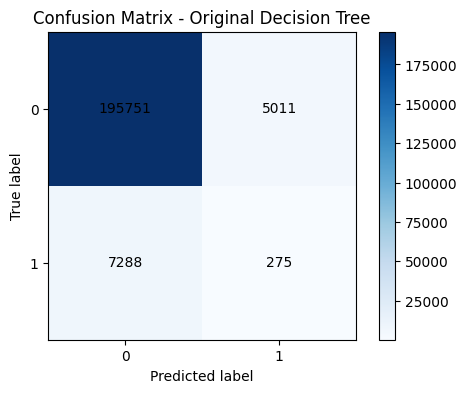

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
run_DecisionTree(X_train, X_val, X_test, y_train, y_val, y_test)

- Despite achieving a high accuracy of **94.10%**, the model's performance is actually poor, indicated by the extremely low F1-score (**0.0428**) and ROC AUC score near **0.5**. These metrics suggest that we're dealing with an imbalanced dataset where the model is likely predicting the majority class most of the time, failing to effectively identify the minority class.

In [ ]:
ratio = df['y'].value_counts(normalize=True) * 100

print("Values ratio:")
for value, percentage in ratio.items():
    print(f"Value {value}: {percentage:.2f}%")

Values ratio:
Value 0: 96.36%
Value 1: 3.64%


## 3. Use binning methods

### 3.1 Feature selection for binning



In [ ]:
categorical, binary, continuous = [], [], []

for column in df.columns:
    if 'bin' in column:
        binary.append(column)
    elif 'cat' in column:
        categorical.append(column)
    elif column != 'y':
        continuous.append(column)

- There is no way to bin binary features, so let's move to categical and continuos features.

- Let's print all unique values for each categorical feature and add those with many unique values to the binning array.


In [ ]:
X[categorical].nunique()

,0
xind_02_cat,5
xind_04_cat,3
xind_05_cat,8
xcar_01_cat,13
xcar_02_cat,3
xcar_03_cat,3
xcar_04_cat,10
xcar_05_cat,3
xcar_06_cat,18
xcar_07_cat,3


- `xcar_11_cat` has 104 unique values, so it would probably be better to bin this feature.

- Now let's consider continuous features. I decided to bin them using the "**3-sigma rule**", suggesting these features have extreme values that might benefit from binning to reduce their impact on the model.

In [ ]:
features_to_bin = ['xcar_11_cat']

for col in continuous:
    col_mean = X[col].mean()
    col_std = X[col].std()
    col_max, col_min = X[col].max(), X[col].min()

    if col_max > col_mean + 3 * col_std or col_min < col_mean - 3 * col_std:
        features_to_bin.append(col)

In [ ]:
features_to_bin

['xcar_11_cat',
 'xind_14',
 'xreg_02',
 'xreg_03',
 'xcar_11',
 'xcar_12',
 'xcar_13',
 'xcar_14',
 'xcar_15',
 'xcalc_05',
 'xcalc_06',
 'xcalc_07',
 'xcalc_08',
 'xcalc_09',
 'xcalc_10',
 'xcalc_11',
 'xcalc_12',
 'xcalc_13',
 'xcalc_14']

### 3.2 Apply binning and compare results

In [ ]:
N_BINS = 5 # randomly chosen; can show better if the difference exists

def apply_binning(X_train, X_val, X_test, features_to_bin, strategy):
    datasets = [X_train.copy(), X_val.copy(), X_test.copy()]

    for feature in features_to_bin:
        discretizer = KBinsDiscretizer(n_bins=N_BINS, encode='ordinal', strategy=strategy)

        datasets[0][f"{feature}_binned"] = discretizer.fit_transform(X_train[[feature]])
        datasets[1][f"{feature}_binned"] = discretizer.transform(X_val[[feature]])
        datasets[2][f"{feature}_binned"] = discretizer.transform(X_test[[feature]])

        for dataset in datasets:
            dataset.drop(feature, axis=1, inplace=True)

    return datasets[0], datasets[1], datasets[2]

- The two binning methods used are:
    - **Equal-Width (Uniform) Binning**: Divides the range of values into equal-width intervals;
    - **Equal-Frequency (Quantile) Binning**: Creates bins with approximately equal number of samples in each.


Original Decision Tree
Accuracy: 0.9410
F1-score: 0.0428
ROC AUC: 0.5019


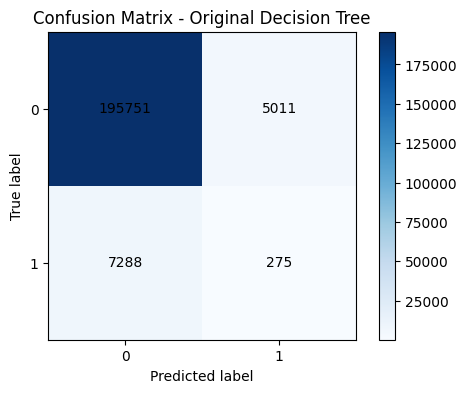


Equal-Width Binning
Accuracy: 0.9311
F1-score: 0.0514
ROC AUC: 0.4855


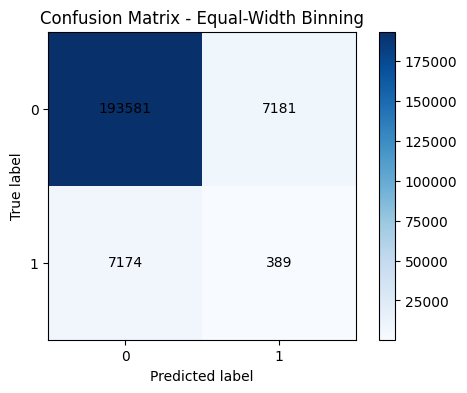


Equal-Frequency Binning
Accuracy: 0.9253
F1-score: 0.0548
ROC AUC: 0.4936


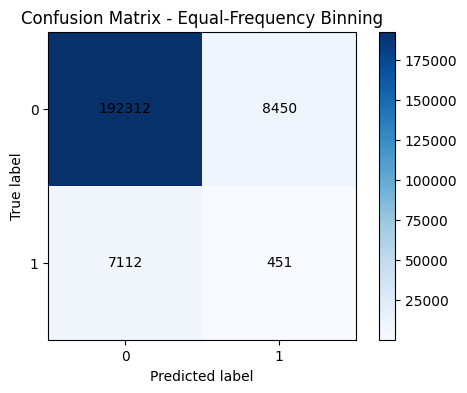

In [ ]:
def compare_binning_methods(X_train, X_val, X_test, y_train, y_val, y_test, features_to_bin):
    run_DecisionTree(X_train, X_val, X_test, y_train, y_val, y_test)

    X_train_width, X_val_width, X_test_width = apply_binning(X_train, X_val, X_test, features_to_bin, 'uniform')
    run_DecisionTree(X_train_width, X_val_width, X_test_width, y_train, y_val, y_test, "Equal-Width Binning")

    X_train_freq, X_val_freq, X_test_freq = apply_binning(  X_train, X_val, X_test, features_to_bin, 'quantile')
    run_DecisionTree(X_train_freq, X_val_freq, X_test_freq, y_train, y_val, y_test, "Equal-Frequency Binning")

X3_train, X3_val, X3_test, y3_train, y3_val, y3_test = split_data(X, y)
compare_binning_methods(X3_train, X3_val, X3_test, y3_train, y3_val, y3_test, features_to_bin)

- The application of both binning methods did not bring significant improvements to the model: a slight increase in F1-score was accompanied by minor decreases in accuracy and ROC AUC. Such minimal changes in metrics indicate that binning is not an effective strategy for improving the model in this case.

## 4. Use balancing methods

1. SMOTE (Synthetic Minority Over-sampling Technique):
  - Dealing with imbalanced datasets where minority class is underrepresented;
  - Creates synthetic samples of minority class by interpolating between existing minority samples;
  - Equalizes class distribution by increasing minority class samples to match majority class.

2. Random Under-Sampling:
  - Dealing with dataset having severe class imbalance;
  - Randomly removes samples from majority class until balanced with minority class;
  - Equalizes class distribution by reducing majority class samples to match minority class.

3. ADASYN (Adaptive Synthetic Sampling):
  - Providing more focus on difficult-to-learn minority examples;
  - Similar to SMOTE but generates more synthetic data for minority class instances that are harder to learn;
  - Creates slightly different numbers of synthetic samples for different minority instances.

In [ ]:
def apply_balancing(X_train, y_train, method):
    if method == 'SMOTE':
        balancer = SMOTE(random_state=RND_STATE)
    elif method == 'Random Under-Sampling':
        balancer = RandomUnderSampler(random_state=RND_STATE)
    elif method == 'ADASYN':
        balancer = ADASYN(random_state=RND_STATE)
    else:
        raise ValueError("Unknown method")

    X_resampled, y_resampled = balancer.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

Original data:
y
0    172009
1      6554
Name: count, dtype: int64

Original Decision Tree
Accuracy: 0.9410
F1-score: 0.0428
ROC AUC: 0.5019


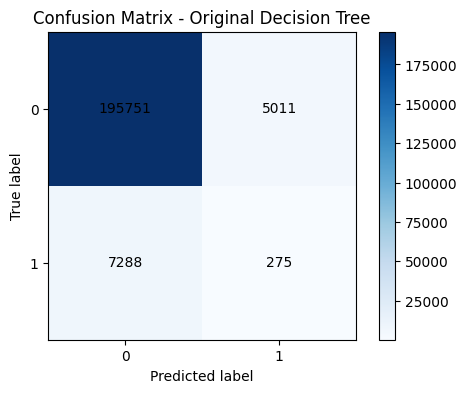


SMOTE balanced data:
y
1    172009
0    172009
Name: count, dtype: int64

SMOTE
Accuracy: 0.9004
F1-score: 0.0586
ROC AUC: 0.5064


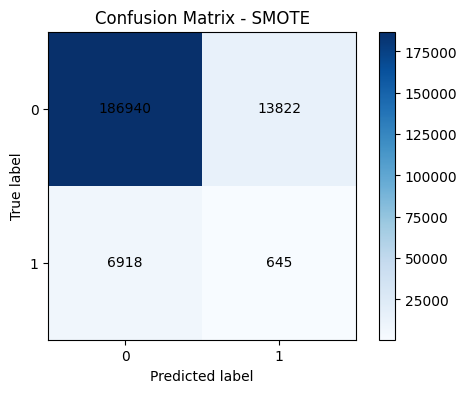


Random Under-Sampling balanced data:
y
0    6554
1    6554
Name: count, dtype: int64

Random Under-Sampling
Accuracy: 0.5431
F1-score: 0.0744
ROC AUC: 0.5225


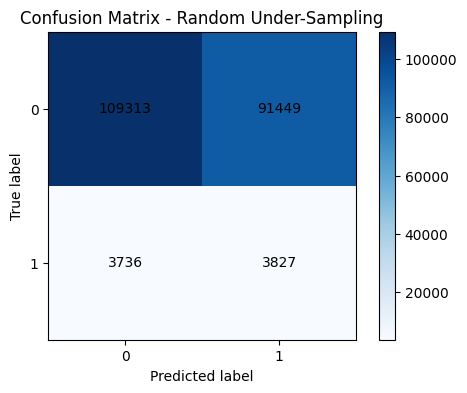


ADASYN balanced data:
y
0    172009
1    170498
Name: count, dtype: int64

ADASYN
Accuracy: 0.8996
F1-score: 0.0584
ROC AUC: 0.5056


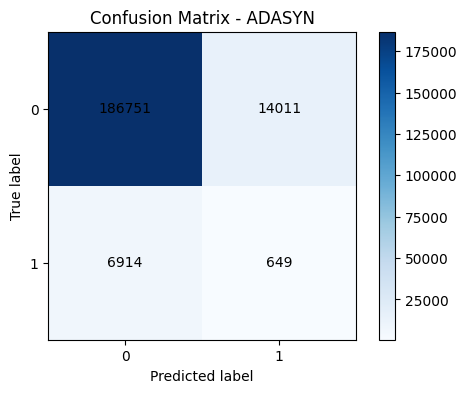

In [ ]:
balancing_methods = ["SMOTE", "Random Under-Sampling", "ADASYN"]
X4_train, X4_val, X4_test, y4_train, y4_val, y4_test = split_data(X, y)

print("Original data:")
print(y_train.value_counts())
run_DecisionTree(X4_train, X4_val, X4_test, y4_train, y4_val, y4_test)

for method in balancing_methods:
    X4_train_resampled, y4_train_resampled = apply_balancing(X4_train, y4_train, method)
    print(f"\n{method} balanced data:")
    print(pd.Series(y4_train_resampled).value_counts())
    run_DecisionTree(X4_train_resampled, X4_val, X4_test, y4_train_resampled, y4_val, y4_test, method)

- Key observations:
  - All balancing methods improved model's ability to detect minority class;
  - `Random Under-Sampling` showed best balance between classes but at cost of overall accuracy;
  - `SMOTE` and `ADASYN` maintained higher accuracy while still improving F1-score.

## 5. Transform the features

- The function performs two essential preprocessing steps:
    - For **categorical** and **binary** features fills **NaN** with mode (most frequent value); for continuous features fills **NaN** with median value. It ensures mo missing values remain in the dataset;
    - For **continuous** features uses `StandardScaler` to normalize data (mean=0, std=1); for **categorical** features uses `Normalizer` to scale the data.


Original Decision Tree
Accuracy: 0.9410
F1-score: 0.0428
ROC AUC: 0.5019


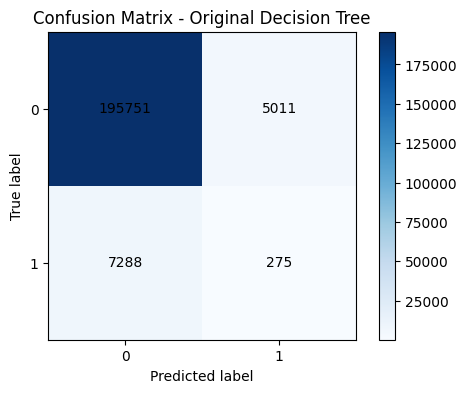


Preprocessed Decision Tree
Accuracy: 0.9433
F1-score: 0.0419
ROC AUC: 0.4803


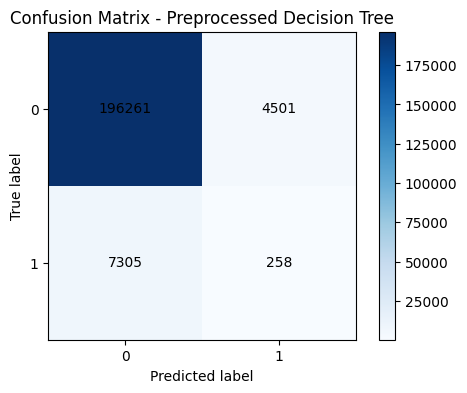

In [ ]:
def preprocess_data(df):
    df_processed = df.copy()
    df_processed = df_processed.replace(-1, np.nan)

    for col in [*categorical, *binary]:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

    for col in continuous:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

    scaler = StandardScaler()
    normalizer = Normalizer()

    df_processed[continuous] = scaler.fit_transform(df_processed[continuous].values)
    df_processed[categorical] = normalizer.fit_transform(df_processed[categorical].values)

    return df_processed

X51_train, X51_val, X51_test, y51_train, y51_val, y51_test = split_data(X, y)
run_DecisionTree(X51_train, X51_val, X51_test, y51_train, y51_val, y51_test)

df_processed = preprocess_data(df)

X5 = df_processed.drop('y', axis=1)
y5 = df_processed['y']

X52_train, X52_val, X52_test, y52_train, y52_val, y52_test = split_data(X5, y5)
run_DecisionTree(X52_train, X52_val, X52_test, y52_train, y52_val, y52_test, 'Preprocessed Decision Tree')

- The preprocessing made negligible difference (slightly improved accuracy but decreased F1-score and ROC AUC). Probably we should focus on handling the class imbalance instead.

## 6. Find suitable subset of data

### 6.1 Cumulative sum

- This approach sorts features by their importance score in descending order and calculates cumulative sum of importance scores. Then it selects features that collectively explain up to **85%** of total importance. It reduces dimensionality by keeping only the most important features using an interpretable method (**cumulative importance**).

Selected 27 features that explain 85.0% of importance
Selected features: ['xcar_13', 'xreg_03', 'xcar_14', 'xcalc_14', 'xcalc_10', 'xind_15', 'xcalc_11', 'xind_03', 'xcalc_13', 'xcar_11_cat', 'xcalc_08', 'xreg_02', 'xcalc_07', 'xcalc_02', 'xcalc_06', 'xcar_12', 'xcalc_01', 'xcalc_05', 'xcalc_03', 'xcar_01_cat', 'xind_01', 'xreg_01', 'xcalc_04', 'xcalc_09', 'xcar_06_cat', 'xcar_15', 'xcalc_12']

Original Decision Tree
Accuracy: 0.9374
F1-score: 0.0394
ROC AUC: 0.4956


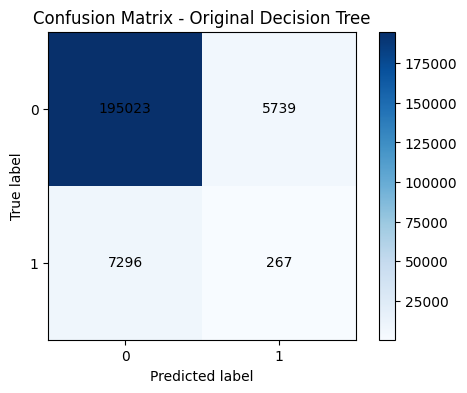

In [ ]:
def select_features_cumsum(X_train, X_val, X_test, model, cumsum_threshold=0.85):
    importances = model.feature_importances_
    feature_importances = pd.Series(importances, index=X_train.columns)
    sorted_importances = feature_importances.sort_values(ascending=False)

    cumsum = np.cumsum(sorted_importances)
    selected_features = sorted_importances[cumsum <= cumsum_threshold].index

    X_train_selected = X_train[selected_features]
    X_val_selected = X_val[selected_features]
    X_test_selected = X_test[selected_features]

    print(f"Selected {len(selected_features)} features that explain {cumsum_threshold*100}% of importance")
    print("Selected features:", list(selected_features))

    return X_train_selected, X_val_selected, X_test_selected

X61_train, X61_val, X61_test, y61_train, y61_val, y61_test = split_data(X, y)
model = train_and_get_classifier(X61_train, y61_train)
X61_train_selected, X61_val_selected, X61_test_selected = select_features_cumsum(X61_train, X61_val, X61_test, model)
run_DecisionTree(X61_train_selected, X61_val_selected, X61_test_selected, y61_train, y61_val, y61_test)

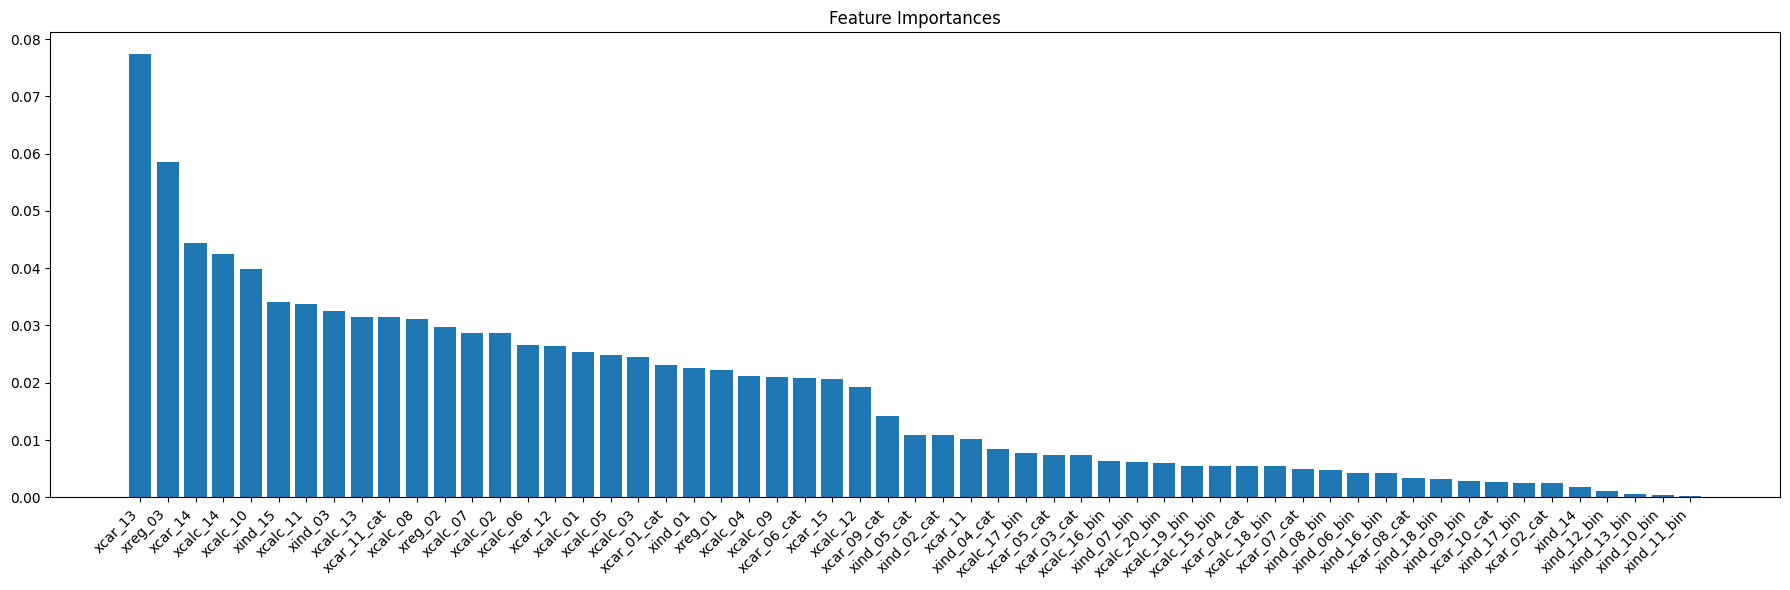

In [ ]:
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(18, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_feature_importance(model, X_train.columns)

### 6.2 Select K-best

- How `SelectKBest` approach works:
  - Uses chi-square statistical test to score features against target variable and measure dependence between feature and target;
  - Features are ranked by their scores in descending order;
  - For each k (number of features to keep) trains model and evaluates performance; keeps track of best performing feature subset;


Best k: 22
Best F1-score: 0.0481
Selected features: ['xind_17_bin', 'xind_07_bin', 'xcar_04_cat', 'xind_06_bin', 'xcar_03_cat', 'xind_16_bin', 'xreg_02', 'xcar_05_cat', 'xind_05_cat', 'xind_08_bin', 'xind_09_bin', 'xcar_13', 'xind_01', 'xreg_03', 'xind_15', 'xcar_08_cat', 'xreg_01', 'xind_18_bin', 'xcar_07_cat', 'xcar_06_cat', 'xcar_15', 'xcar_02_cat']

SelectKBest Decision Tree
Accuracy: 0.9372
F1-score: 0.0534
ROC AUC: 0.4893


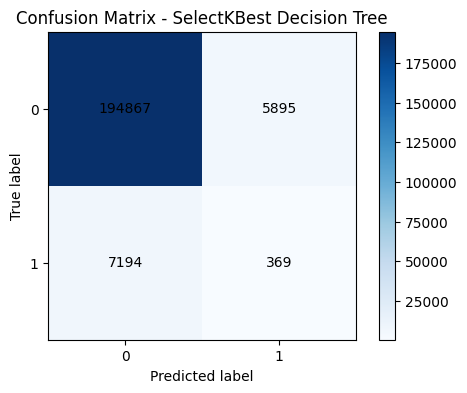


Original Decision Tree
Accuracy: 0.9410
F1-score: 0.0428
ROC AUC: 0.5019


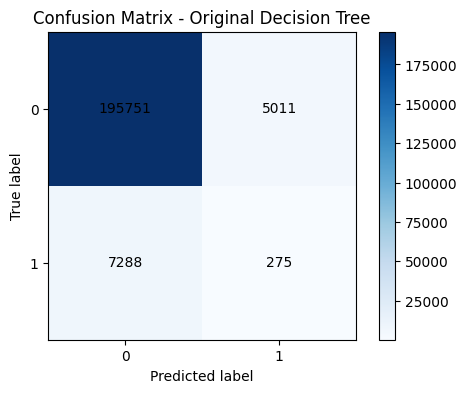

In [ ]:
def select_best_features(X_train, X_val, X_test, y_train, k_values=None):
    if k_values is None:
        k_values = range(1, X_train.shape[1] // 2)

    best_score = -np.inf
    best_k = None
    best_features = None

    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns
    )

    selector = SelectKBest(score_func=chi2, k='all')
    selector.fit(X_train_scaled, y_train)
    feature_scores = dict(zip(X_train.columns, selector.scores_))

    for k in k_values:
        selected = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)[:k]
        selected_features = [f[0] for f in selected]

        clf = train_and_get_classifier(X_train[selected_features], y_train)
        predictions = clf.predict(X_val[selected_features])

        acc = accuracy_score(y_val, predictions)
        f1 = f1_score(y_val, predictions)

        if f1 > best_score:
            best_score = f1
            best_k = k
            best_features = selected_features.copy()

    print(f"\nBest k: {best_k}")
    print(f"Best F1-score: {best_score:.4f}")
    print("Selected features:", best_features)

    return X_train[best_features], X_val[best_features], X_test[best_features]

X62_train, X62_val, X62_test, y62_train, y62_val, y62_test = split_data(X, y)
X62_train_selected, X62_val_selected, X62_test_selected = select_best_features(X62_train, X62_val, X62_test, y62_train)
run_DecisionTree(X62_train_selected, X62_val_selected, X62_test_selected, y62_train, y62_val, y62_test, "SelectKBest Decision Tree")

run_DecisionTree(X_train, X_val, X_test, y_train, y_val, y_test)

- As we can see, we increased the F1-score by **25%** with negligible decrease in accuracy. However, an F1-score of **0.05** is still not satisfactory.

## 7. Use PCA (Principal component analysis) for feature dimension reduction

In [ ]:
def plot_pca_components(explained_variance):
    plt.figure(figsize=(18, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance (%)')
    plt.title('Explained Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.grid()
    plt.show()

Top 5 Principal Components and their Explained Variance (%):
Principal Component  Explained Variance (%)
                PC1               90.785651
                PC2                2.535722
                PC3                1.100164
                PC4                0.700165
                PC5                0.630066


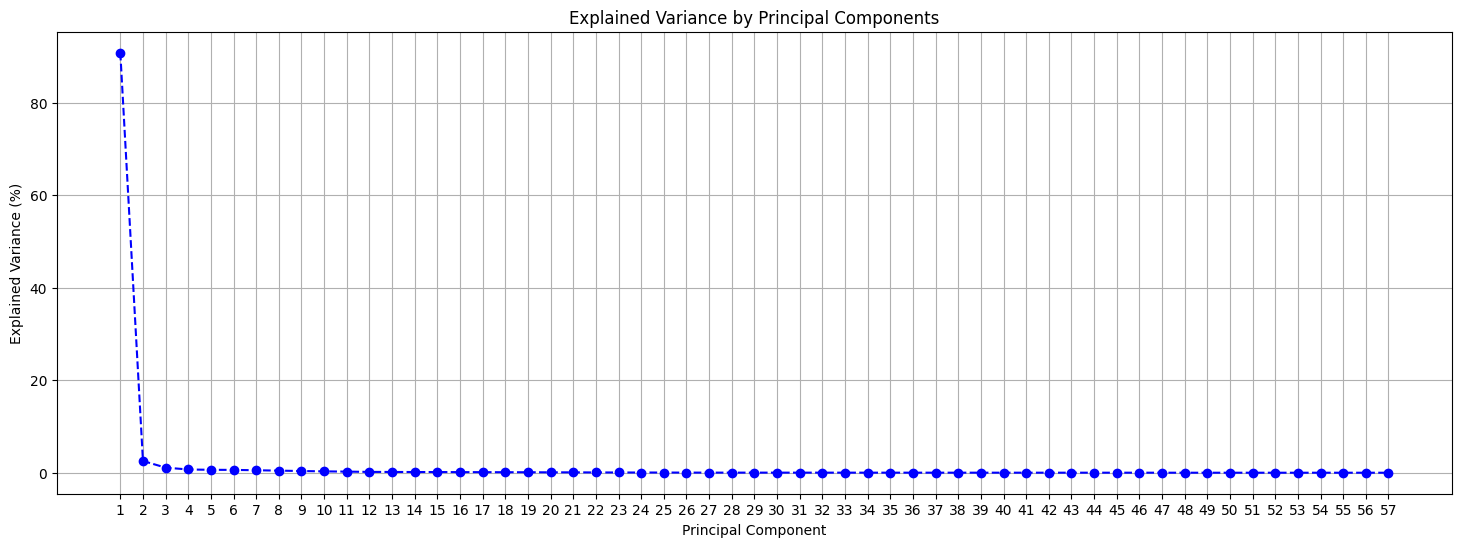

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_ * 100
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance (%)': explained_variance
})

print("Top 5 Principal Components and their Explained Variance (%):")
print(explained_variance_df.head(5).to_string(index=False))
plot_pca_components(explained_variance)

- The plot shows the percentage of explained variance by each principal component. Since after the third component the percentage is less than 1%, it is reasonable to keep only 3 components and train the classifier.




Original Decision Tree
Accuracy: 0.9551
F1-score: 0.0181
ROC AUC: 0.5222


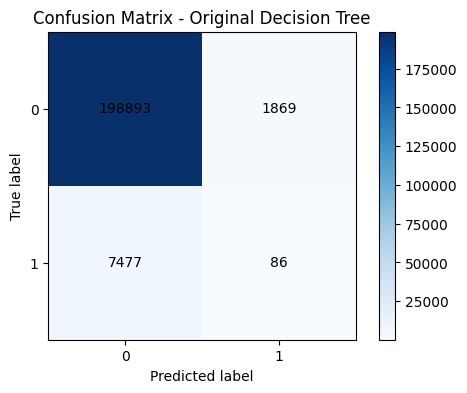

In [ ]:
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train)
X_val_pca_3 = pca_3.transform(X_val)
X_test_pca_3 = pca_3.transform(X_test)

run_DecisionTree(X_train_pca_3, X_val_pca_3, X_test_pca_3, y_train, y_val, y_test)

- Trading an **80%** decrease in F1-score for a **1%** gain in accuracy does not seem sensible.

## 8. Combine methods to achieve the best possible result in classification task

- Since we were going through different steps and attempts to improve the classifier's output, I noticed 3 really effective approaches that can help us. We will:
  - Balance the dataset using `SMOTE` oversampling technique;
  - Replace missing values;
  - Apply `SelectKBest` method to keep only the important features.



Original Decision Tree
Accuracy: 0.9410
F1-score: 0.0428
ROC AUC: 0.5019


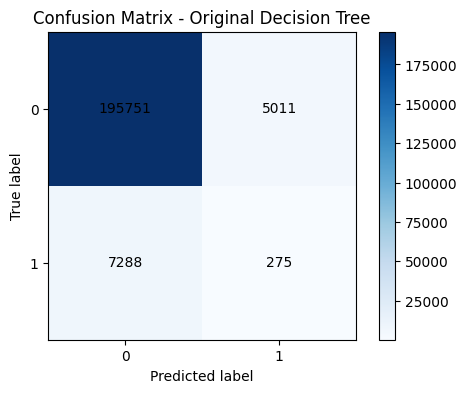

In [ ]:
run_DecisionTree(X_train, X_val, X_test, y_train, y_val, y_test)


Best k: 6
Best F1-score: 0.0804
Selected features: ['xind_06_bin', 'xcalc_18_bin', 'xcalc_19_bin', 'xcalc_20_bin', 'xind_09_bin', 'xcalc_15_bin']

Final Decision Tree
Accuracy: 0.7077
F1-score: 0.0794
ROC AUC: 0.5346


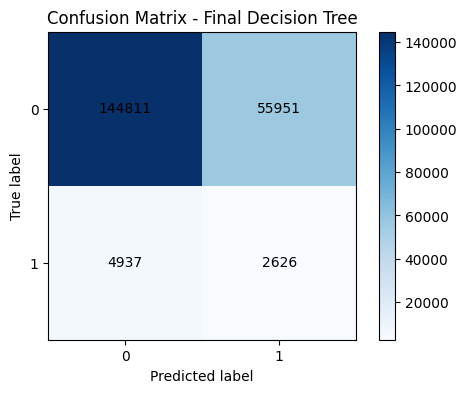

In [ ]:
df_processed = preprocess_data(df)

Xf = df_processed.drop('y', axis=1)
yf = df_processed['y']

Xf_train, Xf_val, Xf_test, yf_train, yf_val, yf_test = split_data(Xf, yf)

Xf_train_balanced, yf_train_balanced = apply_balancing(Xf_train, yf_train, method='SMOTE')

Xf_train_final, Xf_val_final, Xf_test_final = select_best_features(
    Xf_train_balanced,
    Xf_val,
    Xf_test,
    yf_train_balanced,
)

run_DecisionTree(Xf_train_final, Xf_val_final, Xf_test_final, yf_train_balanced, yf_val, yf_test, "Final Decision Tree")

- Results:
  - Accuracy decreased by ~**23.33%** (from 94.10% to 70.77%);
  - F1-score increased by ~**87.85%** (from 4.28% to 8.04%);
  - ROC AUC improved slightly by ~**3.27%** (from 50.19% to 53.46%).

- Key Conclusions:
    - The original high accuracy was misleading due to class imbalance;
    - The improvement in F1-score indicates better balanced performance across both classes;
    - The confusion matrices show more balanced predictions for both classes.

- The model is now more reliable for real-world applications, because of better identifying minority class cases, although F1-score is still very low.